# Week 5 (SVM, Tree-based Models)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR

- SVC (Classification)
- SVR (Regression)

## 1.1 Hard Margin Classifier

### Q1.1 Hard Margin Classifier란? :

In [2]:
# 데이터셋 생성
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8]])
y = np.array([0, 0, 0, 1, 1, 1])

### Q1.2 위 데이터셋을 2차원의 좌표평면에 시각화해주세요.

---



---



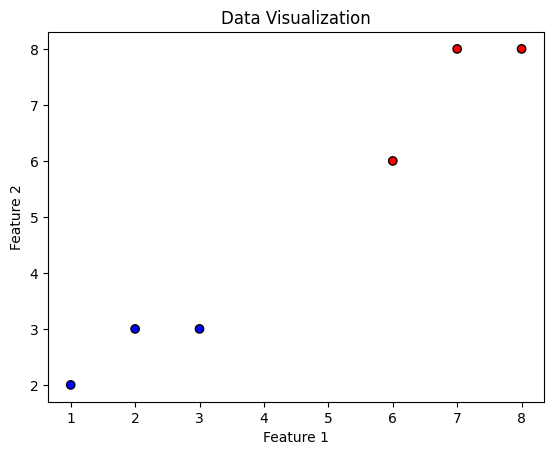

In [4]:
# plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')  # c=y for color-coding by class
# c 는 "color"의 약자로, 산점도에 그려지는 점들의 색상을 제어
# y 는 데이터 포인트의 클래스 레이블을 담고 있는 배열

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Visualization')
plt.show()

In [5]:
# Hard Margin SVM 모델 학습
model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Q1.3 하단 w와 b는 모델 학습으로 찾아낸 Wx+b의 계수와 상수항입니다. w와 b를 정의해주세요.

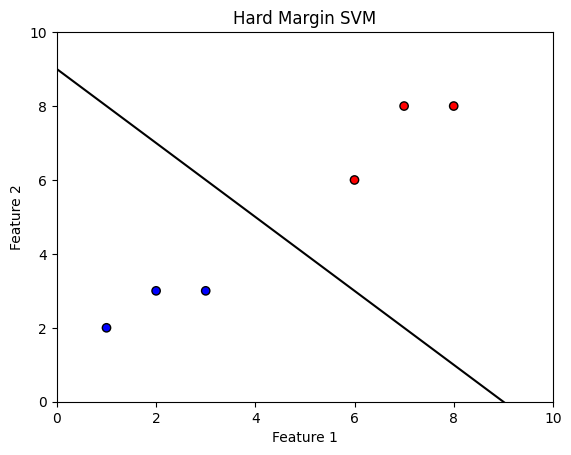

In [6]:
# w와 b 정의
w = model.coef_[0]
b = model.intercept_[0]

# 결정 경계 시각화
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM')
plt.show()

## 1.2 Soft Margin Classifier

### Q2.1 Soft Margin Classifier란?

### Q2.2 Soft Margin의 정의를 떠올리며, 노이즈가 추가된 데이터셋을 생성해주세요. (2개 이상 추가 생성 필요)

In [8]:
# 데이터셋 생성 (약간의 노이즈 추가)
X = np.array([[1, 2], [2, 3], [3, 3], [6, 6], [7, 8], [8, 8], [3, 5], [7, 5]])
y = np.array([0, 0, 0, 1, 1, 1, 0, 1])

In [9]:
# Soft Margin SVM 모델 학습
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

SVC(kernel='linear')

### Q2.3 마진을 산출해 시각화하고, Support Vector을 찾아주세요.

하단 그림은 예시로, 꼭 똑같이 출력되지 않아도 됩니다.

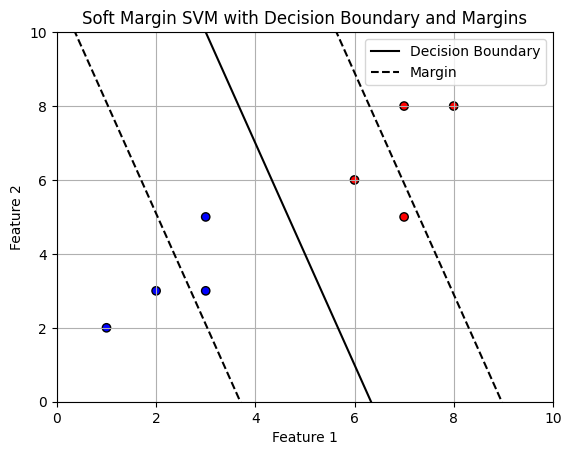

In [10]:
# 결정 경계 시각화
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 10, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# 마진 경계 계산
margin = 1 / np.linalg.norm(w)
y_margin_positive = y_plot + margin / w[1]
y_margin_negative = y_plot - margin / w[1]

# 마진 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.plot(x_plot, y_margin_positive, 'k--', label='Margin')
plt.plot(x_plot, y_margin_negative, 'k--')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Soft Margin SVM with Decision Boundary and Margins')
plt.legend()
plt.grid(True)
plt.show()

## 1.3 프로젝트 (SVC)

In [11]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

### **Linear SVC**

In [12]:
iris = load_iris()

X = iris.data[:, :2]
y = iris.target

C = 1
clf = SVC(kernel = "linear", C=C)
clf.fit(X,y)

SVC(C=1, kernel='linear')

In [13]:
y_pred = clf.predict(X) # 학습 데이터의 재예측 (실습용)
confusion_matrix(y, y_pred) # 따라서, 분류 결과가 상당히 정확할 수밖에 없음을 감안해야 함

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

### Q3.1 위 예시처럼, 옵션을 linear로 설정해도 되지만, sklearn의 LinearSVC 함수를 사용해도 구현할 수 있습니다. LinearSVC로 재구현해주세요.

In [15]:
from sklearn.svm import LinearSVC # LinearSVC 모델
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
iris = load_iris()

X = iris.data[:, :2]  # 처음 2개의 특성만 사용
y = iris.target # 타겟 변수 (꽃의 종류)를 설정

C = 1.0  # SVM 정규화 parameter 설정
clf = LinearSVC(C=C, random_state=0) # LinearSVC 모델 생성. random_state는 재현성을 위해 설정
clf.fit(X, y)

y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

### **Kernal SVC**

### Q3.2 Kernel SCV - non-linear한 형태의 SVM을 하나 이상 구현해주세요. 동일하게, 학습데이터를 predict하여 confusion matrix를 구해주세요.

In [ ]:
from sklearn.svm import SVC # SVM 모델
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

iris = load_iris()

X = iris.data[:, :2]  # 처음 두 개의 특성만 사용
y = iris.target # 타겟 변수(꽃의 종류)를 설정

# 비선형 커널 (예: 'rbf')을 사용합니다.
clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
clf.fit(X, y)

y_pred = clf.predict(X) .
confusion_matrix(y, y_pred)

## 2. 다항식 (polynomial) 커널
다항식 커널은 데이터 포인트 간의 유사도를 다항식 함수로 계산합니다. degree 매개변수를 사용하여 다항식의 차수를 지정할 수 있으며, 차수가 높을수록 더 복잡한 결정 경계를 만들 수 있습니다.



In [16]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

iris = load_iris()
X = iris.data[:, :2]  # 처음 두 개의 특성만 사용
y = iris.target

# 다항식 커널 사용 (degree=3)
clf = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=0)
clf.fit(X, y)

y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]])

##3. 시그모이드 (Sigmoid) 커널
시그모이드 커널은 데이터 포인트 간의 유사도를 시그모이드 함수로 계산합니다. 시그모이드 함수는 S자 모양의 곡선을 가지며, 이를 사용하여 비선형 결정 경계를 만들 수 있습니다.



In [17]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

iris = load_iris()
X = iris.data[:, :2]  # 처음 두 개의 특성만 사용
y = iris.target

# 시그모이드 커널 사용
clf = SVC(kernel='sigmoid', C=1.0, gamma='scale', random_state=0)
clf.fit(X, y)

y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[36,  0, 14],
       [46,  0,  4],
       [49,  0,  1]])

- RBF 커널은 다양한 데이터셋에 적용 가능하며, 일반적으로 좋은 성능을 보입니다.
- Polynomial 커널은 복잡한 결정 경계를 생성할 수 있지만, 차수가 높을수록 계산량이 증가합니다.
- Sigmoid 커널은 특정 데이터셋에 효과적일 수 있지만, 성능이 RBF보다 낮을 수 있습니다.

### 시각화

### Q3.3 아래 예시 plot처럼, linear model과 non-linear 모델의 시각화 결과를 출력해주세요.

<ipython-input-19-fe8481d51cbd>:50: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-fe8481d51cbd>:50: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-fe8481d51cbd>:50: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-fe8481d51cbd>:50: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-fe8481d51cbd>:50: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-fe8481d51cbd>:50: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-fe8481d51cbd>:50: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython

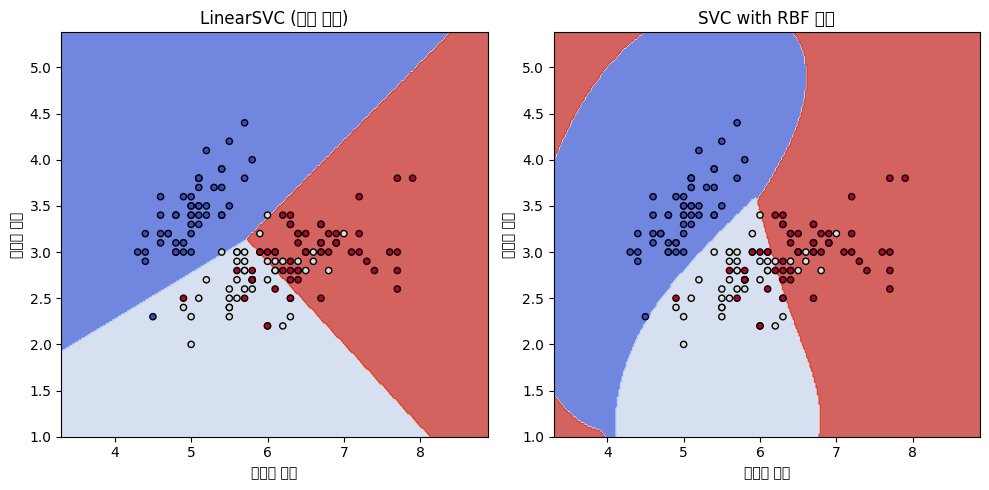

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 처음 두 개의 특성만 사용
y = iris.target # 타겟 변수(꽃의 종류)를 설정

# 선형 및 RBF 커널 SVM 모델 생성
C = 1.0  # SVM 정규화 매개변수
models = (
    LinearSVC(C=C, max_iter=10000),  # 선형 커널
    SVC(kernel="rbf", gamma=0.7, C=C),  # RBF 커널
)

# 플롯 제목
models_names = (
    "LinearSVC (선형 커널)",
    "SVC with RBF 커널",
)

# 1x2 그리드 플롯 설정 (선형, RBF 모델만 표시)
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) # 1x2 그리드 플롯을 생성

# 각 모델에 대한 플롯 생성
for model, name, ax in zip(models, models_names, axes):
    # 메쉬 그리드 생성
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # 모델 학습 및 결정 경계 예측
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 플롯
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # 데이터 포인트 플롯
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")

    # 플롯 설정
    ax.set_xlabel("꽃받침 길이")
    ax.set_ylabel("꽃받침 너비")
    ax.set_title(name)

plt.tight_layout()
plt.show()

## 2.1. Decision Tree

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [21]:
# 데이터 로드 및 전처리
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Q1.1 max_depth 파라미터를 변경하면 트리의 구조와 성능이 어떻게 변할까요?

In [22]:
# 결정 트리 모델 생성 및 학습
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=3, min_samples_leaf=2, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

### Q1.2 'gini'와 'entropy' 기준의 차이는 무엇이며, 결과에 어떤 영향을 미칠까요?
결정 트리에서 'gini'와 'entropy'는 노드를 분할하는 기준을 결정하는 불순도 측정 지표. 둘 다 노드의 불순도를 측정하지만, 계산 방식과 결과에 미치는 영향에 차이가 있음
###1. Gini 불순도
Gini 불순도는 클래스가 잘못 분류될 확률을 측정.
즉, 노드에서 무작위로 선택한 데이터 포인트가 잘못 분류될 확률을 나타냄.
Gini 불순도는 다음과 같이 계산됨
####Gini 불순도 = 1 - (각 클래스의 비율)^2의 합
###2. Entropy 불순도
Entropy 불순도는 노드의 불확실성을 측정.
즉, 노드에서 데이터 포인트의 클래스를 예측하기 위한 정보량을 나타냄.
Entropy 불순도는 다음과 같이 계산됨

####Entropy 불순도 = - (각 클래스의 비율) * log2(각 클래스의 비율)의 합

### Q1.3 각 노드의 분할 기준 어떻게 되는지 설명해보세요.

In [23]:
# 트리 시각화 (Graphviz)
dot_data = export_graphviz(
    tree_model,
    out_file=None,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True
)

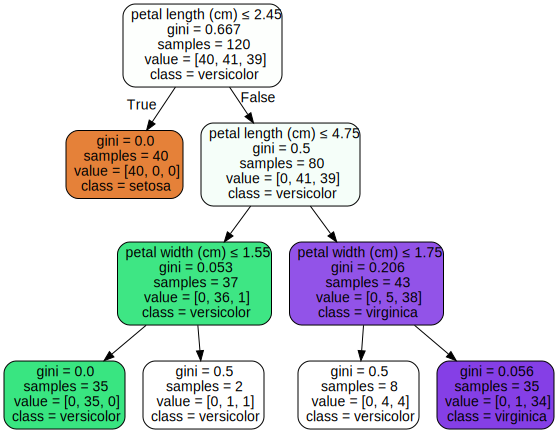

In [24]:

# 그래프 출력
graph = graphviz.Source(dot_data)
graph

## 3. 앙상블 학습: 부스팅(Boosting) 모델

Adaboost, Gradient Boosting Model은 scikit learn에서 지원하지만, LightGBM과 XGBoost의 경우는 외부 패키지를 불러와야 합니다.

Boosting 계열의 모델들은 데이터 개수가 적으면 overfitting이 일어나는 경우가 많으니, 주의해야 합니다.

In [4]:
# 필요한 패키지 로드
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()

In [5]:
# 데이터 로드
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

In [27]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Q3.1 `housing_df`를 train, test split을 해봅시다.

분할 비율을 자유롭게 설정해봅시다.

In [6]:
# 데이터 분할
X = housing_df.drop(columns=['MedHouseVal'])
y = housing_df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

### Q3.2  데이터를 `RandomForestRegressor`에 적합해 봅시다.
train set 에 대해 `MedHouseVal`을 종속변수, 나머지를 독립변수로 하는 random forest regressor를 적합해 봅시다.

test set으로 prediction을 한 후 MSE를 구해 봅시다.

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# RandomForestRegressor model 생성
rf_model = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters here

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2553684927247781


### Q3.3 데이터를 `AdaBoostRegressor`에 적합해봅시다.



위와 동일

In [11]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Create an AdaBoostRegressor model
ab_model = AdaBoostRegressor(random_state=42)  # You can adjust hyperparameters here

# Fit the model to the training data
ab_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ab_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.614478459432694


### Q3.4 데이터를 `GradientBoostingRegressor`에 적합해 봅시다.

위와 동일

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor(random_state=42)  # You can adjust hyperparameters here

# Fit the model to the training data
gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbr_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2939973248643864


### Q3.5 데이터를 `lightgbm` 회귀에 적합해 봅시다.

파라미터를 자세히 살펴보고, 자유롭게 설정해 봅시다.

Documentation
https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html

예시
https://www.geeksforgeeks.org/regression-using-lightgbm/


In [14]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Set hyperparameters
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the model
model = lgb.train(params,
                train_data,
                num_boost_round=100,
                valid_sets=[test_data],
                callbacks=[lgb.early_stopping(stopping_rounds=10)])  # Use callbacks for early stopping

# Make predictions on the test set
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.232855
Mean Squared Error: 0.23285525605518215


### Q3.6 데이터를 `xgboost`에 적합해 봅시다.

파라미터는 자유롭게 설정해 봅시다

In [15]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Create an XGBoost regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)  # You can adjust hyperparameters here

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.2225899267544737


### Q3.7 `RandomForestRegressor`의 feature importance를 시각화해봅시다.

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

위를 참고해보면서 Q2에서 적합한 random forest regressor의 feature importance를 시각화해 봅시다.

중요한 feature 부터 내림차순으로 시각화해 봅시다.

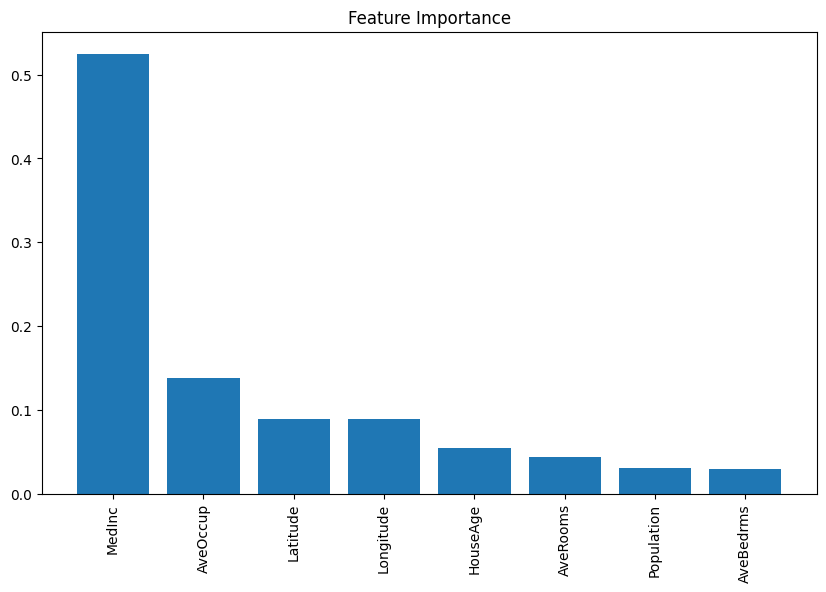

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'rf_model' is your trained RandomForestRegressor

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10,6)) # Adjust figure size if needed

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### (BONUS) 1. Boosting 모델 각각의 특징을 정리해보세요. 2. 모델 성능을 높이기 위하여 어떤 시도를 하면 좋을지 고민해 보세요.

RandomForest

*  여러 개의 결정 트리를 앙상블
*  높은 예측 성능, 과적합 방지
*  해석 어려움, 느린 학습 속도



AdaBoost

*   약한 학습기를 순차적으로 학습하여 가중치를 조정.
*   이상치에 민감
*   과적합 가능성


GBR

*   손실 함수의 기울기를 사용하여 약한 학습기를 학습
*   높은 예측 성능
*   계산 비용 높음

LGBM

*   leaf-wise 트리 분할 방식으로 속도 향상
*   빠른 학습 속도
*   과적합 가능성

XGBoost

*   GBM의 정규화 기능 강화
*   높은 예측 성능, 과적합 방지
*   	LightGBM보다 느림





